# Time Series Forecasting



## Introduction

**Time series forecasting is a powerful technique used to predict future values based on previously observed values.** 

It has applications in various fields such as finance, weather forecasting, and supply chain management. 

*In the context of Bitcoin (BTC) prices, time series forecasting can help traders and investors make informed decisions by predicting future price movements.*

**Key Concepts of Stationary Processes in Time Series Analysis**

*A stationary process, also known as a stationary time series, is a* **statistical model where the properties of the data do not change over time**.

In a stationary process, **the mean, variance, and autocovariance structure remain constant across different time periods**.

*This implies that the statistical properties of the process, such as the distribution of the data and the relationship between data points, are time-invariant*.

A typical example of a stationary process is white noise, which consists of uncorrelated random variables with a constant mean and variance. In white noise, each data point is independent of others and has the same probability distribution, making it stationary.

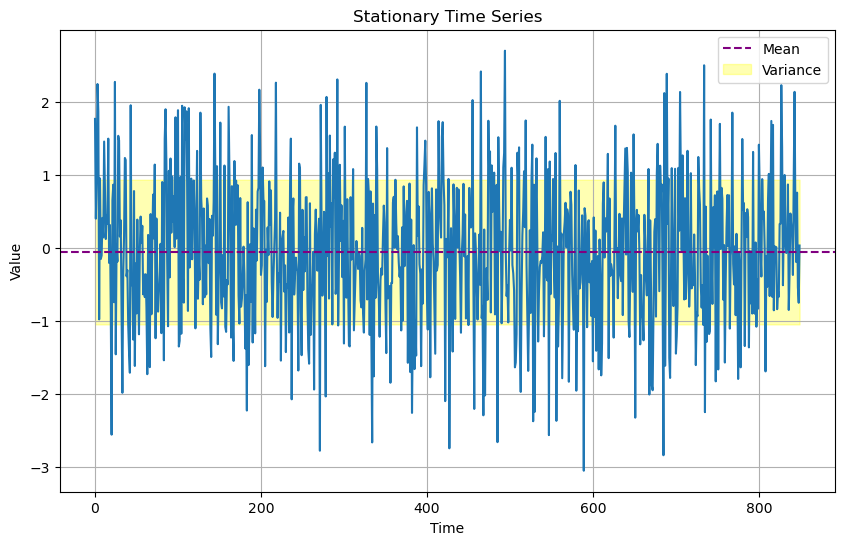

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for a stationary process
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=850)

# Calculate mean and variance
mean = np.mean(data)
variance = np.var(data)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.axhline(mean, color='purple', linestyle='--', label='Mean')
plt.fill_between(range(len(data)), mean - np.sqrt(variance), mean + np.sqrt(variance),
                 alpha=0.3, color='yellow', label='Variance')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Stationary Time Series')
plt.legend()
plt.grid(True)
plt.show()

**Understanding the Sliding Window Technique in Algorithms**

A sliding window, also known as a rolling window, is a technique used in time series analysis and signal processing to **analyze data by moving a fixed-size window along the sequence of data points**.

*The window slides through the data sequentially, with each iteration capturing a subset of consecutive data points. The window size determines the number of data points considered at each step*.

By applying operations or computations within the sliding window, such as calculating averages, sums, or other statistical measures, it allows for localized analysis and extraction of patterns or insights.

The sliding window technique is commonly used for smoothing data, detecting anomalies, feature extraction, and implementing time series forecasting models that utilize a fixed-size history to make predictions.

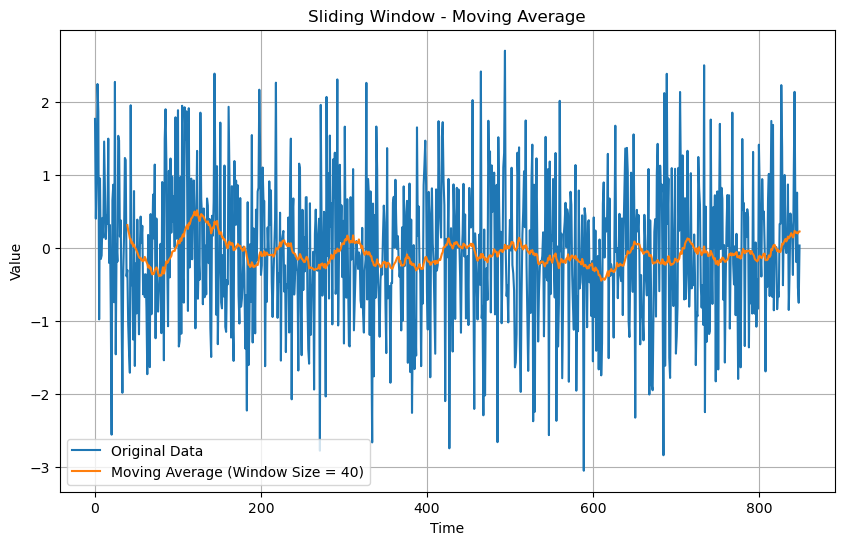

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random time series data
np.random.seed(0)
data = np.random.randn(850)  # Random data points

# Define sliding window size and calculate moving average
window_size = 40
moving_average = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot the original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(np.arange(window_size-1, len(data)), moving_average, label=f'Moving Average (Window Size = {window_size})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sliding Window - Moving Average')
plt.legend()
plt.grid(True)
plt.show()

## How to preprocess time series data?

**Handling missing values**: Determine the appropriate method to handle missing values, such as interpolation or forward/backward filling.

**Resampling**: If the data is unevenly spaced, resample it to a fixed frequency using techniques like upsampling or downsampling.

**Removing outliers**: Identify and handle any outliers or anomalies in the data that may impact the analysis or model performance.

**Normalization/Scaling**: Normalize or scale the data to a common range to mitigate the influence of different scales and enable fair comparisons between variables.

**Detrending**: Remove any trend or seasonality present in the data, such as by differencing or using techniques like moving averages.

**Feature engineering**: Extract relevant features from the time series, such as lagged variables, rolling statistics, or Fourier transforms, to capture important patterns.

**Train-test split**: Divide the data into training and test sets for model evaluation, ensuring that the temporal order is maintained.

By performing these preprocessing steps, the time series data is cleaned, standardized, and made ready for analysis, forecasting, or modeling tasks.

## Exploratory Data Analysis (EDA)

**Loading the Dataset**

The dataset is read into a pandas DataFrame:

In [14]:
import pandas as pd

# Read the dataset from CSV file
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

# Display the first few rows of the dataset
print("\n\nDataset example (first 5 rows)")
print(df.head())



Dataset example (first 5 rows)
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           NaN                NaN   
4  1417412220    NaN    NaN    NaN    NaN           NaN                NaN   

   Weighted_Price  
0           300.0  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


### How many rows and columns are in the dataset?

In [15]:
#Check the number of rows and columns in the dataset
df.shape

(2099760, 8)

### What are the column names and data types?

In [16]:
#Get the column names and data types
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

###  Are there any missing values in the dataset? If so, how many?

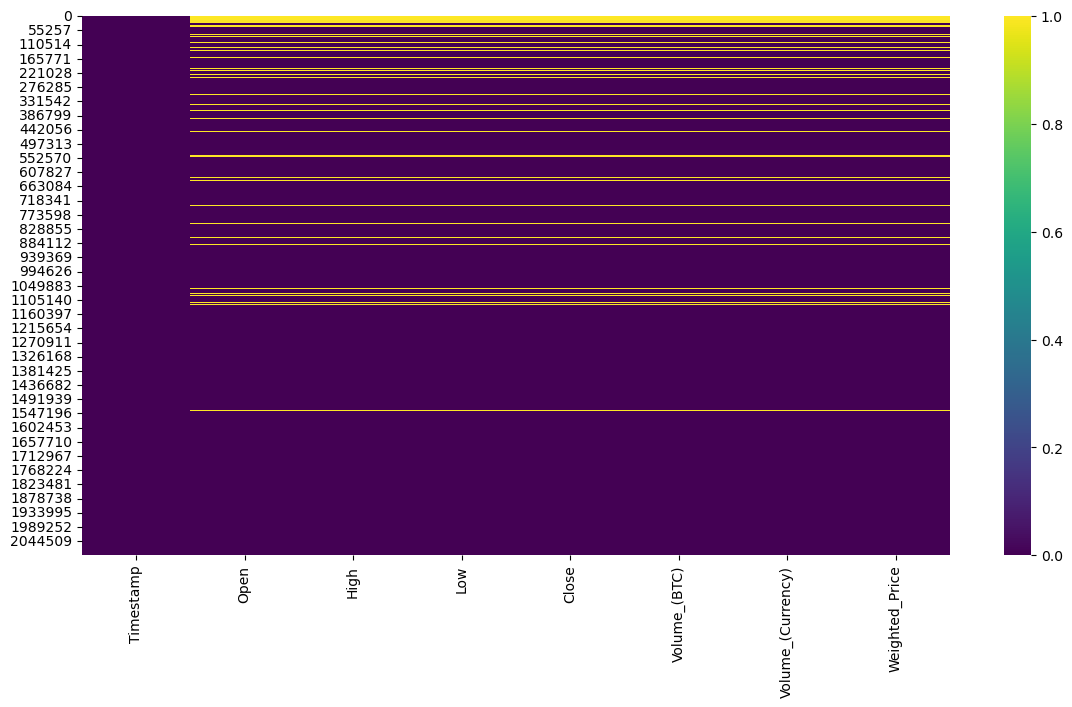

In [17]:
#Identify and visualize missing values
df.isnull().sum()

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

### What are the summary statistics for the numerical columns?

In [18]:
#Generate summary statistics for the numerical columns
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


### How does the timestamp column look, and can it be converted to a more readable format?

In [19]:
#Convert the timestamp column to a readable datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Visualizing the dataset**

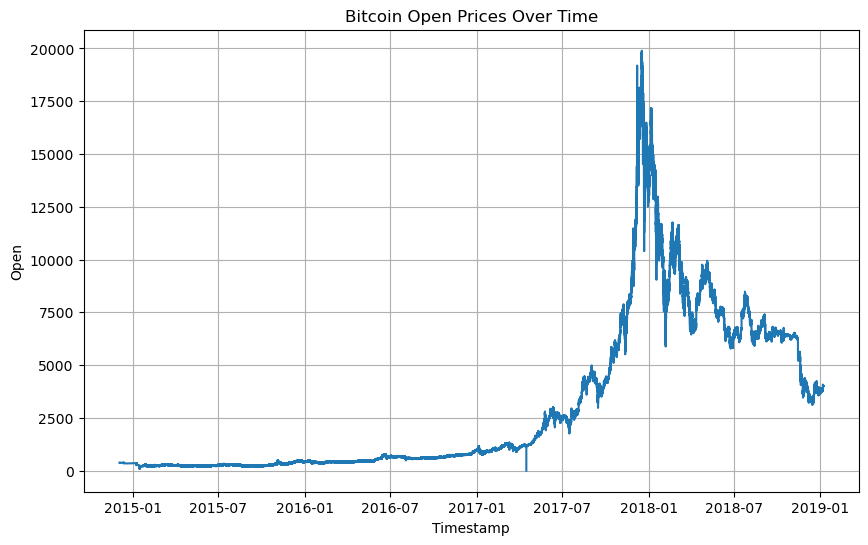

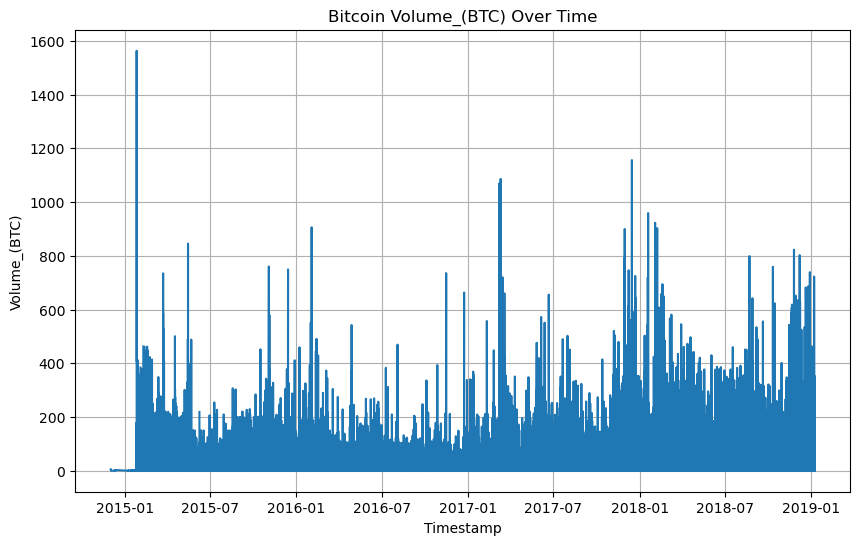

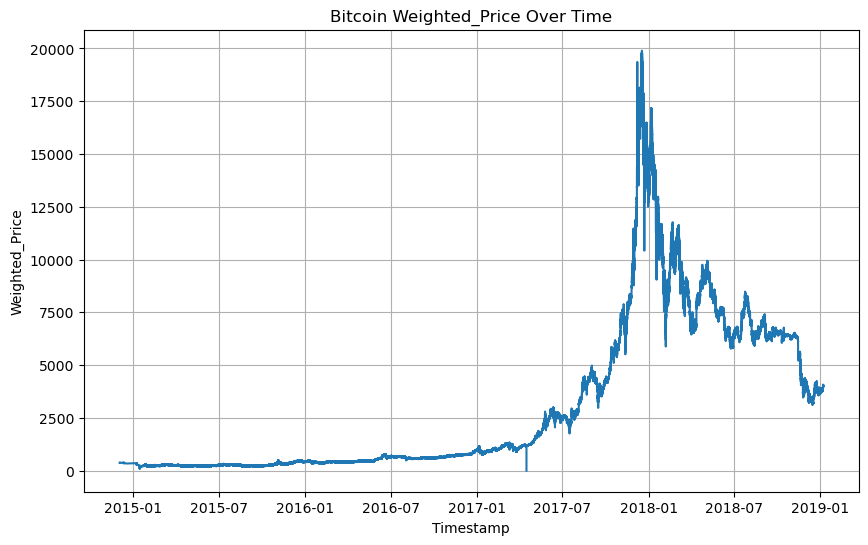

In [20]:
import matplotlib.pyplot as plt

# Visualize the 'Open' column
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Open'])
plt.xlabel('Timestamp')
plt.ylabel('Open')
plt.title('Bitcoin Open Prices Over Time')
plt.grid(True)
plt.show()

# Visualize the 'Volume_(BTC)' column
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Volume_(BTC)'])
plt.xlabel('Timestamp')
plt.ylabel('Volume_(BTC)')
plt.title('Bitcoin Volume_(BTC) Over Time')
plt.grid(True)
plt.show()

# Visualize the 'Weighted_Price' column
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Weighted_Price'])
plt.xlabel('Timestamp')
plt.ylabel('Weighted_Price')
plt.title('Bitcoin Weighted_Price Over Time')
plt.grid(True)

### What does the distribution of the 'Close' price look like?

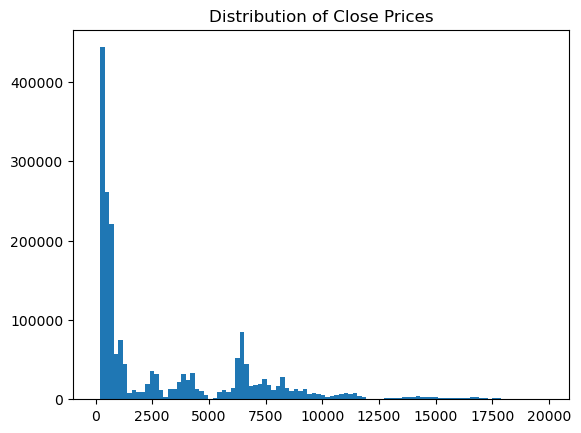

In [21]:
#Visualize the distribution of the 'Close' price
df['Close'].dropna().hist(bins = 100)
plt.title("Distribution of Close Prices")
plt.grid(False)
plt.show()

### How do the 'Open', 'High', 'Low', and 'Close' prices vary over time?

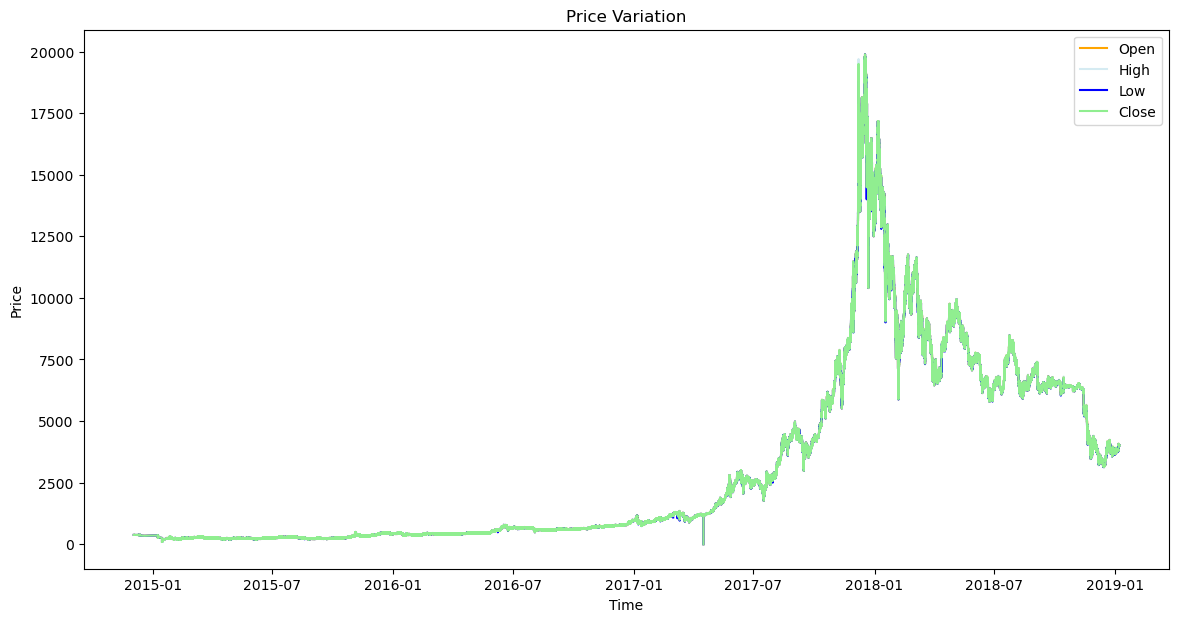

In [22]:
#Plot the variation of 'Open', 'High', 'Low', and 'Close' prices over time
plt.figure(figsize=(14, 7))

plt.plot(df['Timestamp'], df['Open'], label='Open', color='orange')
plt.plot(df['Timestamp'], df['High'], label='High', color='lightblue', alpha=0.5)
plt.plot(df['Timestamp'], df['Low'], label='Low', color='blue')
plt.plot(df['Timestamp'], df['Close'], label='Close', color='lightgreen')

# Add titles and labels
plt.legend()
plt.title("Price Variation")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)

# Show the plot
plt.show()


### Are there any correlations between numerical columns?

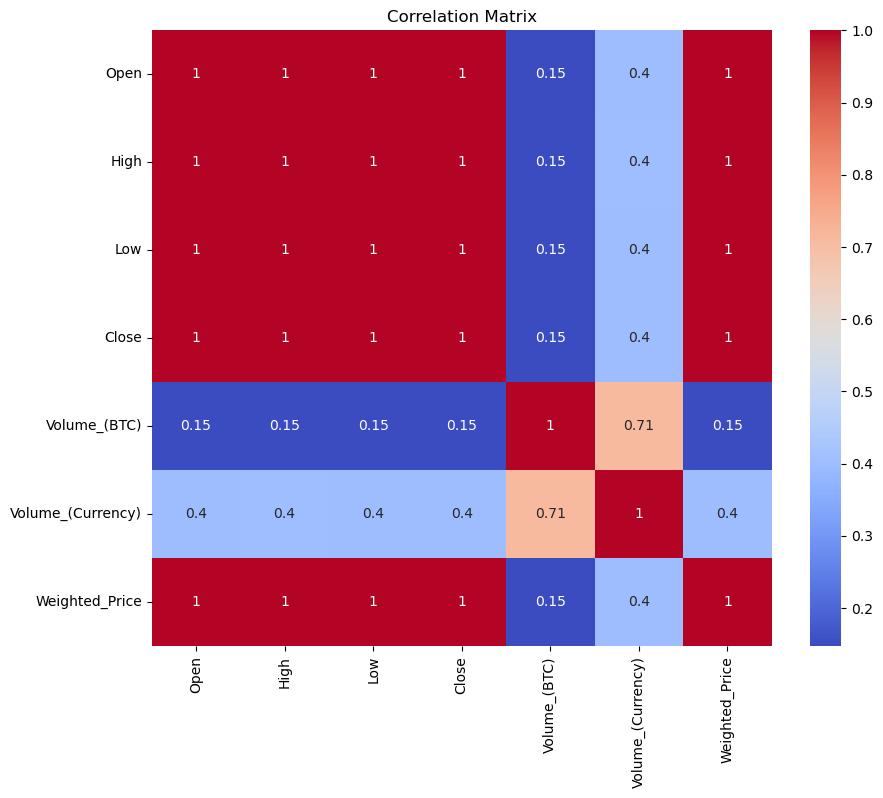

In [23]:
#Compute and visualize the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

###  What is the trend of Bitcoin volume over time?

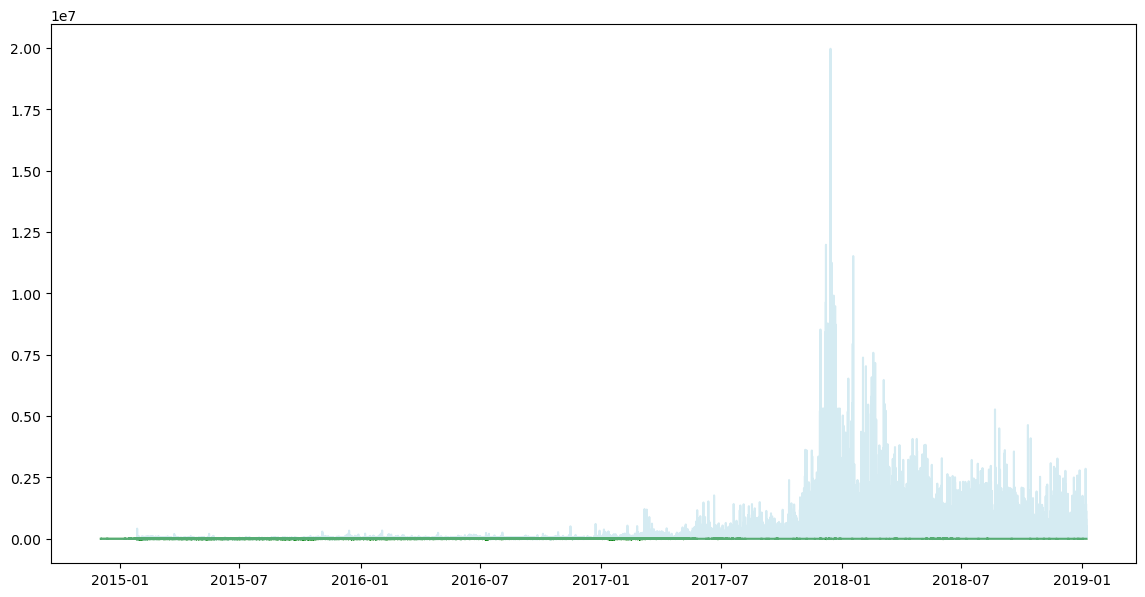

In [24]:
#Plotting Bitcoin volume
plt.figure(figsize=(14, 7))

plt.plot(df['Timestamp'], df['Volume_(BTC)'], color='green')
plt.plot(df['Timestamp'], df['Volume_(Currency)'], color='lightblue', alpha=0.5)
plt.show()

**Check, Visualize, and Remove Missing Value**

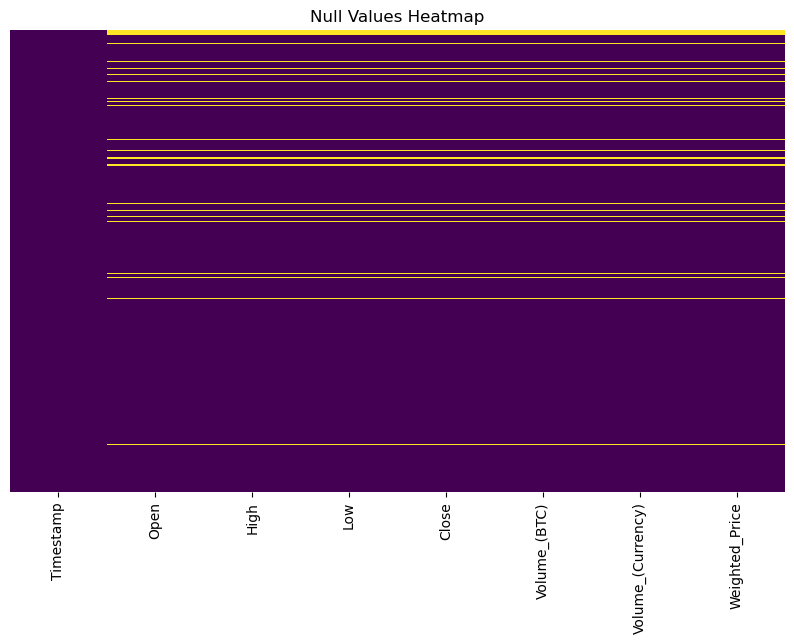

In [25]:
import seaborn as sns

# Generate a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Null Values Heatmap')
plt.show()

### How can we handle missing values in the dataset?

In [26]:
#Check for missing values
print(df.isna().sum())

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64


In [27]:
#Drop rows with any missing values
df_clean = df.dropna()

#Verify that there are no missing values
df_clean.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [28]:
#Displaying the first few rows of both DataFrames
display(df, df_clean)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,2019-01-07 22:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,2019-01-07 22:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,2019-01-07 22:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,2019-01-07 22:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
7,2014-12-01 05:40:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
51,2014-12-01 06:24:00,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000
77,2014-12-01 06:50:00,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000
1436,2014-12-02 05:29:00,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000
...,...,...,...,...,...,...,...,...
2099755,2019-01-07 22:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,2019-01-07 22:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,2019-01-07 22:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,2019-01-07 22:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


**Split the Data**

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split the data into training and remaining data
train_data, remaining_data = train_test_split(df, train_size=train_ratio, random_state=42)

# Split the remaining data into validation and testing
val_data, test_data = train_test_split(remaining_data, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

# Verify the sizes of the split datasets
print("Training data size:", train_data.shape)
print("Validation data size:", val_data.shape)
print("Testing data size:", test_data.shape)

Training data size: (1469832, 8)
Validation data size: (419952, 8)
Testing data size: (209976, 8)


**Data Split Distribution**

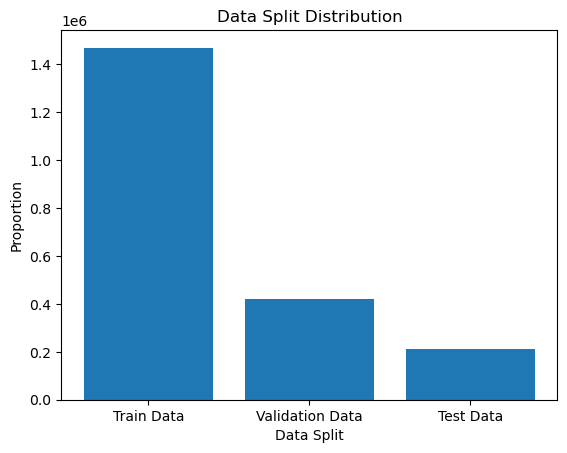

In [31]:
# Create a bar plot
labels = ['Train Data', 'Validation Data', 'Test Data']
values = [train_data.shape[0], val_data.shape[0], test_data.shape[0]]

plt.bar(labels, values)
plt.xlabel('Data Split')
plt.ylabel('Proportion')
plt.title('Data Split Distribution')
plt.show()

**Visualize the Preprocessed data**

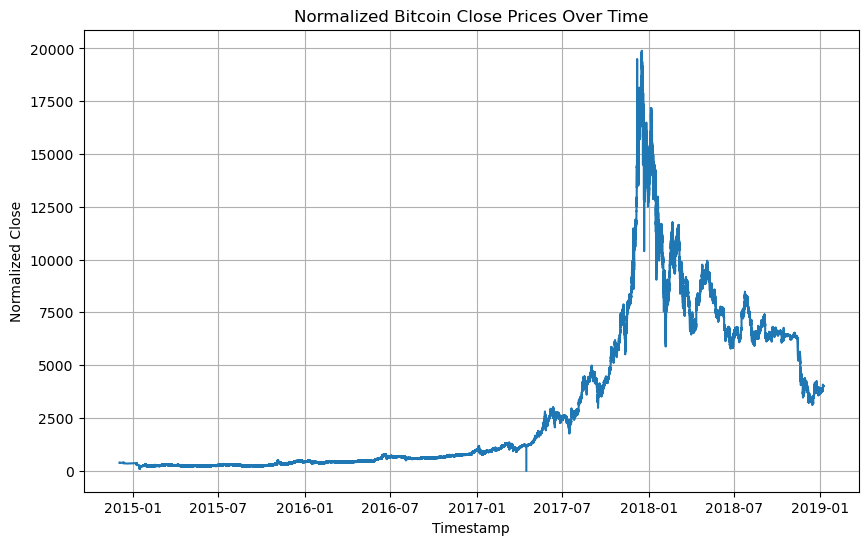

In [32]:
# Plot the normalized 'Close' column against 'Timestamp'
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Close'])
plt.xlabel('Timestamp')
plt.ylabel('Normalized Close')
plt.title('Normalized Bitcoin Close Prices Over Time')
plt.grid(True)
plt.show()


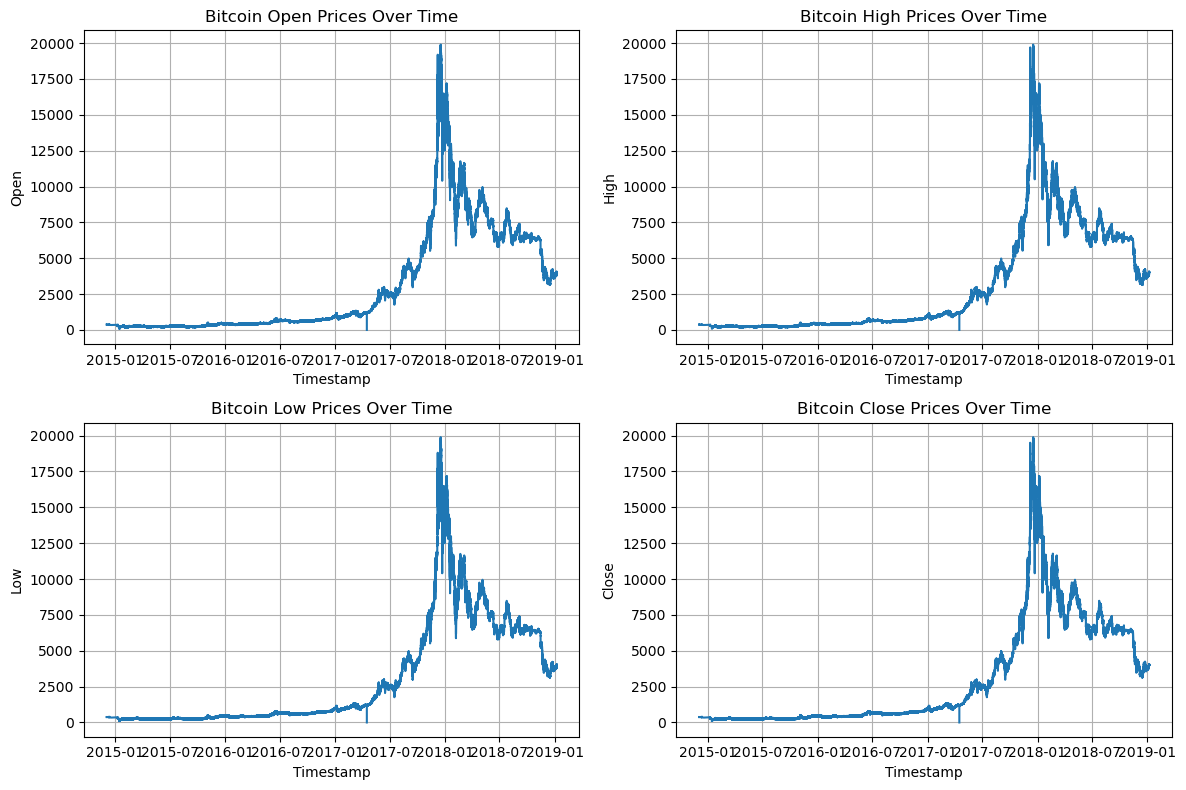

In [34]:
# Select the four columns to visualize
columns = ['Open', 'High', 'Low', 'Close']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through the columns and plot against 'Timestamp'
for i, ax in enumerate(axes.flat):
    ax.plot(df['Timestamp'], df[columns[i]])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(columns[i])
    ax.set_title(f'Bitcoin {columns[i]} Prices Over Time')
    ax.grid(True)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the subplot grid
plt.show()

# Time Series Forecasting - Model Solution

Bitcoin (BTC) became a trending topic after its price peaked in 2018. Many have sought to predict its value in order to accrue wealth. Let’s attempt to use our knowledge of RNNs to attempt just that.

**Are all of the data points useful?**

Generally, it **depends on the specific context and the goal of the analysis.**

In the given context, **all data points are used initially, but then missing values are dropped.**

*Dropping missing values may lead to a loss of some data points, but it ensures that the remaining data points are complete and do not introduce bias in the analysis.*

The usefulness of the data points should be evaluated based on the specific requirements and the quality of the data.

**Are all of the data features useful?**

Similarly, in general, **the usefulness of the data features depends on the specific analysis** and the goal of predicting the value of Bitcoin. 

In our context, the *Timestamp* column is used for indexing, while the *Close* column is used as the main predictor and for visualization.

The other columns (*Open, High, Low, Volume_(BTC), Volume_(Currency), Weighted_Price*) are not explicitly used.

**Should you rescale the data?**

**Yes, rescaling the data is important, especially when using machine learning models or algorithms.**

*Rescaling helps normalize the data and bring all features to a similar scale, preventing certain features from dominating the analysis due to their larger magnitude.*

In our context, the data will be normalized based on the mean and standard deviation of the training data. This ensures that all data points are rescaled consistently and allows for fair comparisons and meaningful analysis.

**Is the current time window relevant?**

In our context, the time window of **70%** *for training*, **20%** *for validation*, and **10%** *for testing* is used.

This choice is based on the available data, common practice, and the objective of predicting the value of Bitcoin.

However, the optimal time window may vary depending on factors such as the volatility and frequency of price changes in the Bitcoin market. Adjustments to the time window can be explored and evaluated to improve the accuracy of the forecasting model.

**How should you save this preprocessed data?**

In our context, the preprocessed data is returned as three separate DataFrames: **train_data**, **valid_data**, and **test_data**. 

These DataFrames can be saved as separate CSV files

*train_data.to_csv('train_data.csv', index=False)*

*valid_data.to_csv('valid_data.csv', index=False)*

*test_data.to_csv('test_data.csv', index=False)*

This allows us to save the preprocessed data in a structured format that can be easily loaded and used for subsequent modeling or analysis tasks.

# Implementation

## 2. Preprocess the Data

### 2.1  Read the Bitcoin data from a CSV file

### 2.2 Convert timestamp to datetime

### 2.3 Remove missing values 

### 2.4 Select useful features

### 2.5 Split the data for training (70%), validation (20%), and testing (10%)

### 2.6 Normalize the data based on training data

### 2.7 Generate a plot to visualize the original 'Close' price data

### 2.8 Generate another plot to visualize the processed 'Close' price data

### 2.9 Save the preprocessed data

In [35]:
#!/usr/bin/env python3
"""
Preprocesses data used to train and predict the value of Bitcoin
"""

import pandas as pd
import matplotlib.pyplot as plt


def preprocess_data():
    """
    Preprocesses the data used to train and predict the value of Bitcoin.

    Returns:
        tuple: A tuple containing the preprocessed training, validation, and testing data.
    """
    
    # Read the Bitcoin data from a CSV file
    data = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

    # Remove missing values
    data = data.dropna()

    # Split the data for training (70%), validation (20%), and testing (10%)
    data_length = len(data)
    train_data  = data[0:int(data_length * 0.7)]
    valid_data  = data[int(data_length * 0.7):int(data_length * 0.9)]
    test_data   = data[int(data_length * 0.9):]

    # Normalize the data based on training data
    train_mean = train_data.mean()
    train_std = train_data.std()
    train_data = (train_data - train_mean) / train_std
    valid_data = (valid_data - train_mean) / train_std
    test_data = (test_data - train_mean) / train_std

    # Generate a plot to visualize the data
    plot_features = data['Close']
    plot_features.index = data['Timestamp']
    plot_features.plot(subplots=True)

    # Generate another plot to visualize the processed data
    plot_features = data['Close']
    plot_features.index = data['Timestamp']
    plt.plot(plot_features.index, plot_features, 'r--', label='Processed')
    plt.xlabel('Time')
    plt.ylabel('Bitcoin Close Value')
    plt.title("Preprocessed Bitcoin Data")
    plt.legend()
    plt.show()

    return train_data, valid_data, test_data

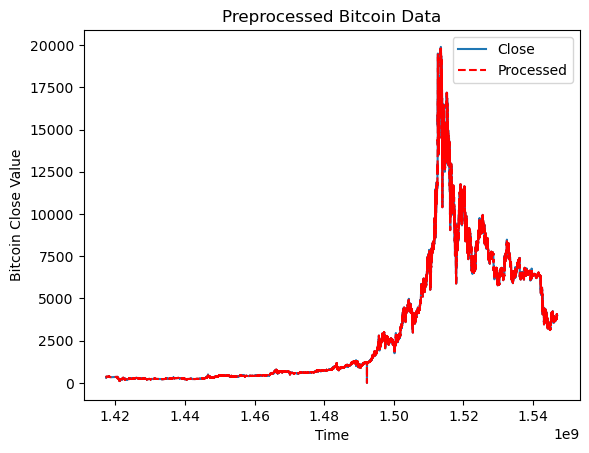

(         Timestamp      Open      High       Low     Close  Volume_(BTC)  \
 0        -1.959813 -0.594395 -0.594450 -0.594326 -0.594397     -0.420441   
 7        -1.959796 -0.594395 -0.594450 -0.594326 -0.594397     -0.420441   
 51       -1.959693 -0.547184 -0.547257 -0.547094 -0.547185     -0.420441   
 77       -1.959632 -0.547184 -0.547257 -0.547094 -0.547185     -0.419404   
 1436     -1.956445 -0.542463 -0.542538 -0.542371 -0.542464     -0.420441   
 ...            ...       ...       ...       ...       ...           ...   
 1500467   1.695717  4.497716  4.495689  4.500007  4.497707     -0.037666   
 1500468   1.695720  4.497716  4.495689  4.500014  4.497707     -0.301579   
 1500469   1.695722  4.497716  4.495689  4.500001  4.497694      0.324191   
 1500470   1.695724  4.497702  4.495682  4.480075  4.487651      1.856946   
 1500471   1.695727  4.487653  4.485637  4.485588  4.487294     -0.044285   
 
          Volume_(Currency)  Weighted_Price  
 0                -0.269688 

In [36]:
preprocess_data()

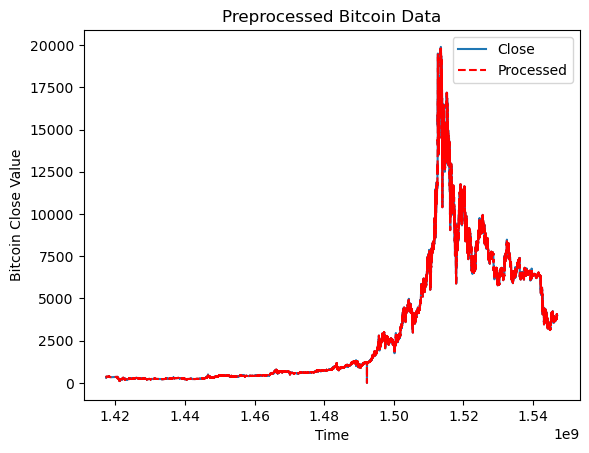

Epoch 1/20
43546/43546 ━━━━━━━━━━━━━━━━━━━━ 252s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0111 - val_loss: 2.7795 - val_mean_absolute_error: 0.8064
Epoch 2/20
43546/43546 ━━━━━━━━━━━━━━━━━━━━ 251s 6ms/step - loss: 2.4882e-05 - mean_absolute_error: 0.0024 - val_loss: 2.9821 - val_mean_absolute_error: 0.8329
Epoch 3/20
43546/43546 ━━━━━━━━━━━━━━━━━━━━ 250s 6ms/step - loss: 1.7187e-05 - mean_absolute_error: 0.0019 - val_loss: 2.9870 - val_mean_absolute_error: 0.8223
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.9560e-05 - mean_absolute_error: 0.0043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


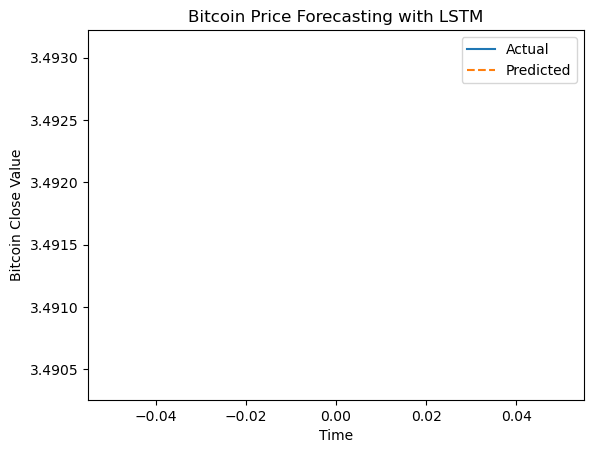

In [47]:
#!/usr/bin/env python3
"""
Creates and trains a model to predict the value of Bitcoin
"""
import numpy as np
import pandas as pd
import tensorflow as tf


class WindowGenerator():
    """
    Create windows of consecutive data samples. 
    Windows are used to find trends within the data to make predictions. 
     - input_width: number of consecutive input time steps to use for each sample
     - label_width: number of time steps in the future to predict
     - shift: number of time steps between consecutive inputs      
    """
    def __init__(self, input_width, label_width, shift,
                 train_data, valid_data, test_data, label_columns=None):
        # Store the raw data.
        self.train_data = train_data
        self.valid_data = valid_data
        self.test_data = test_data

        # Work out the label column indices.
        self.label_columns = label_columns
        
        # dictionary that maps each column name to its corresponding index
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)}
        # maps each column name to its corresponding index
        # easier for tensorflow to access by index
        self.column_indices = {
            name: i for i, name in enumerate(train_data.columns)}

        # window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        # the number of consecutive input time steps and horizon
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        # generates an array of indices for the input window
        self.input_indices = np.arange(
            self.total_window_size)[self.input_slice]

        # starting index for the label window within the total window size
        self.label_start = self.total_window_size - self.label_width
        # a slice object representing the range of indices for the label window to the end
        self.labels_slice = slice(self.label_start, None)
        # generates an array of indices corresponding to the label window
        self.label_indices = np.arange(
            self.total_window_size)[self.labels_slice]
        
    def split_window(self, features):
        """
        Converts list of consecutive inputs into window of inputs and
            window of labels
        """
        # extract the input and label windows from the provided features array, 
        # which represents a batch of consecutive input data.
        # The shape of this array is (batch_size, time_steps, num_features)
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
    
        if self.label_columns is not None:
            # construct a new tensor 
            # selecting all rows, and all time steps, then the
            # corresponding index of the desired label column
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for 
                 name in self.label_columns], axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        # allowing the tensors to accommodate varying batch sizes during training and evaluation
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        """
        Converts time series DataFrame into tf.data.Dataset
        """
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        """
        Sets property to get tf.data.Dataset for training data
        """
        return self.make_dataset(self.train_data)

    @property
    def val(self):
        """
        Sets property to get tf.data.Dataset for validation data
        """
        return self.make_dataset(self.valid_data)

    @property
    def test(self):
        """
        Sets property to get tf.data.Dataset for testing data
        """
        return self.make_dataset(self.test_data)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    
def compile_and_fit(model, window, patience=2, epochs=20):
    """
    Compiles and fits the model to return history
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


def time_series_forecasting(train, valid, test):
    """
    Creates and trains a model to predict the value of Bitcoin

    parameters:
        train: preprocessed training dataset
        valid: preprocessed validation dataset
        test: preprocessed testing dataset
    """
    window = WindowGenerator(input_width=24, label_width=1, shift=1,
                             train_data=train, valid_data=valid,
                             test_data=test, label_columns=['Close'])

    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(24, return_sequences=False),
        tf.keras.layers.Dense(units=1)
    ])

    history = compile_and_fit(lstm_model, window)

    # Make predictions on the test dataset
    test_performance = {}
    test_performance['LSTM'] = lstm_model.evaluate(window.test)

    # Get the example batch from the test dataset for predictions
    inputs, targets = next(iter(window.test))
    
    # Make predictions using the trained model
    predictions = lstm_model.predict(inputs)

    # Plot the actual values and the predicted values
    plt.plot(np.arange(len(targets[0])), targets[0], label='Actual')
    plt.plot(np.arange(len(predictions[0])), predictions[0], label='Predicted', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Bitcoin Close Value')
    plt.title('Bitcoin Price Forecasting with LSTM')
    plt.legend()
    plt.show()

    return test_performance

if __name__ == '__main__':
    train_data, valid_data, test_data = preprocess_data()
    test_performance = time_series_forecasting(train_data, valid_data, test_data)